In [77]:
import numpy as np
import pandas as pd
import cv2
import os 
import matplotlib.pyplot as plt
import random

In [78]:
DIRECTORY = r'C:\Users\teegu\OneDrive\Documents\cricket'
CATEGORIES = ['Bhuvi','Dhoni','Gill','Kohli','Raina']

In [85]:
data = []
i=1

for categories in CATEGORIES:
    folder = os.path.join(DIRECTORY,categories)
    label = CATEGORIES.index(categories)
    
    for img in os.listdir(folder):
        img = os.path.join(folder,img)
        img_arr = cv2.imread(img)
        img_arr = cv2.cvtColor(img_arr,cv2.COLOR_BGR2RGB)
        img_arr = cv2.resize(img_arr,(150,150))
        
        data.append([img_arr,label])
        

In [86]:
data

[[array([[[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         ...,
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]]], dtype=uint8),
  0],
 [array([[[189, 227, 250],
          [191, 229, 252],
          [190, 228, 251],
          ...,

In [87]:
random.shuffle(data)

In [88]:
x = []
y = []

for features,label in data:
    x.append(features)
    y.append(label)
    

In [89]:
x = np.array(x)
y = np.array(y)

In [90]:
x

array([[[[234, 164,  69],
         [238, 169,  74],
         [237, 172,  75],
         ...,
         [  0, 159, 147],
         [  0, 159, 147],
         [  0, 159, 147]],

        [[233, 163,  68],
         [237, 168,  73],
         [236, 171,  75],
         ...,
         [  0, 159, 147],
         [  0, 159, 147],
         [  0, 159, 147]],

        [[233, 163,  68],
         [237, 168,  73],
         [236, 171,  75],
         ...,
         [  0, 159, 147],
         [  0, 159, 147],
         [  0, 159, 147]],

        ...,

        [[ 23,  51,  12],
         [ 24,  51,  13],
         [ 25,  52,  14],
         ...,
         [  0, 159, 147],
         [  0, 159, 147],
         [  0, 159, 147]],

        [[ 20,  45,  10],
         [ 22,  47,  12],
         [ 25,  51,  14],
         ...,
         [  0, 159, 147],
         [  0, 159, 147],
         [  0, 159, 147]],

        [[ 20,  41,  10],
         [ 21,  45,  12],
         [ 25,  51,  14],
         ...,
         [  0, 159, 147],
        

In [91]:
x = x/255

In [92]:
x

array([[[[0.91764706, 0.64313725, 0.27058824],
         [0.93333333, 0.6627451 , 0.29019608],
         [0.92941176, 0.6745098 , 0.29411765],
         ...,
         [0.        , 0.62352941, 0.57647059],
         [0.        , 0.62352941, 0.57647059],
         [0.        , 0.62352941, 0.57647059]],

        [[0.91372549, 0.63921569, 0.26666667],
         [0.92941176, 0.65882353, 0.28627451],
         [0.9254902 , 0.67058824, 0.29411765],
         ...,
         [0.        , 0.62352941, 0.57647059],
         [0.        , 0.62352941, 0.57647059],
         [0.        , 0.62352941, 0.57647059]],

        [[0.91372549, 0.63921569, 0.26666667],
         [0.92941176, 0.65882353, 0.28627451],
         [0.9254902 , 0.67058824, 0.29411765],
         ...,
         [0.        , 0.62352941, 0.57647059],
         [0.        , 0.62352941, 0.57647059],
         [0.        , 0.62352941, 0.57647059]],

        ...,

        [[0.09019608, 0.2       , 0.04705882],
         [0.09411765, 0.2       , 0.05098039]

In [93]:
x.shape

(2374, 150, 150, 3)

In [94]:
import tensorflow as tf
from tensorflow import keras

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation

In [96]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape = x.shape[1:],activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(128,activation = 'relu'))

model.add(Dense(5,activation = 'softmax'))

In [97]:
model.compile(loss = 'SparseCategoricalCrossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [98]:
history = model.fit(x,y,epochs=10,validation_split = 0.2)

Epoch 1/10
67/67 [==============================] - 57s 815ms/step - loss: 1.6103 - accuracy: 0.3198 - val_loss: 1.4759 - val_accuracy: 0.3487
Epoch 2/10
67/67 [==============================] - 54s 800ms/step - loss: 1.2772 - accuracy: 0.4747 - val_loss: 1.4736 - val_accuracy: 0.4328
Epoch 3/10
67/67 [==============================] - 54s 799ms/step - loss: 0.8967 - accuracy: 0.6639 - val_loss: 1.4327 - val_accuracy: 0.4496
Epoch 4/10
67/67 [==============================] - 54s 812ms/step - loss: 0.4534 - accuracy: 0.8567 - val_loss: 1.9017 - val_accuracy: 0.4832
Epoch 5/10
67/67 [==============================] - 56s 840ms/step - loss: 0.1622 - accuracy: 0.9574 - val_loss: 2.1064 - val_accuracy: 0.5042
Epoch 6/10
67/67 [==============================] - 54s 802ms/step - loss: 0.0586 - accuracy: 0.9892 - val_loss: 2.2965 - val_accuracy: 0.5294
Epoch 7/10
67/67 [==============================] - 54s 807ms/step - loss: 0.0419 - accuracy: 0.9939 - val_loss: 2.5748 - val_accuracy: 0.5084

In [99]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 41472)             0         
                                                                 
 dense_6 (Dense)             (None, 128)              

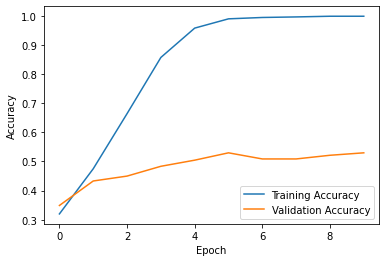

In [100]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the accuracy
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [136]:
img = cv2.imread(r'C:\Users\teegu\OneDrive\Documents\cricket\test1.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(150,150))
img = np.expand_dims(img, axis=0)


In [137]:
prediction = model.predict(img)
prediction

1/1 [==============================] - 0s 67ms/step


array([[0., 0., 0., 0., 1.]], dtype=float32)

In [138]:
for i in range(0,len(prediction[0])):
    if prediction[0][i]==1:
        print(CATEGORIES[i])

Raina


In [142]:
model.save(r'C:\Users\teegu\OneDrive\Documents\cricket\cricket_prediction.h5')